In [157]:
!pip install regex
!pip install seaborn

## Data Cleaning

Here, the null values, conversion of units of required columns, etc are pre processed.

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_csv('./Dataset/Bengaluru_House_Data.csv')

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.00,1.00,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.00,3.00,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.00,3.00,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.00,1.00,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.00,1.00,51.00


In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df.count()

area_type       13320
availability    13320
location        13319
size            13304
society          7818
total_sqft      13320
bath            13247
balcony         12711
price           13320
dtype: int64

In [8]:
df['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [11]:
df['society']

0        Coomee 
1        Theanmp
2            NaN
3        Soiewre
4            NaN
          ...   
13315    ArsiaEx
13316        NaN
13317    Mahla T
13318    SollyCl
13319        NaN
Name: society, Length: 13320, dtype: object

In [5]:
df2 = df[['location', 'size', 'total_sqft', 'bath', 'price']]
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.00,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.00,120.00
2,Uttarahalli,3 BHK,1440,2.00,62.00
3,Lingadheeranahalli,3 BHK,1521,3.00,95.00
4,Kothanur,2 BHK,1200,2.00,51.00


In [13]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df2.dropna(inplace=True)
df2.head()

C:\Users\TR3X\AppData\Local\Temp/ipykernel_5108/3574536728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.00,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.00,120.00
2,Uttarahalli,3 BHK,1440,2.00,62.00
3,Lingadheeranahalli,3 BHK,1521,3.00,95.00
4,Kothanur,2 BHK,1200,2.00,51.00


In [16]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [17]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Feature Engineering

In [20]:
df2['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [7]:
df2['size'] = df2['size'].apply(lambda x:int(x.split()[0]))

df2.head()

C:\Users\TR3X\AppData\Local\Temp/ipykernel_5108/847667411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['size'] = df2['size'].apply(lambda x:int(x.split()[0]))


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.00,39.07
1,Chikka Tirupathi,4,2600,5.00,120.00
2,Uttarahalli,3,1440,2.00,62.00
3,Lingadheeranahalli,3,1521,3.00,95.00
4,Kothanur,2,1200,2.00,51.00


In [22]:
df2['size'].value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: size, dtype: int64

In [8]:
def non_float(x):
    try:
        float(x)
    except:
        return True
    return False

In [9]:
df2[df2['total_sqft'].apply(non_float)]

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.00,186.00
122,Hebbal,4,3067 - 8156,4.00,477.00
137,8th Phase JP Nagar,2,1042 - 1105,2.00,54.01
165,Sarjapur,2,1145 - 1340,2.00,43.49
188,KR Puram,2,1015 - 1540,2.00,56.80
410,Kengeri,1,34.46Sq. Meter,1.00,18.50
549,Hennur Road,2,1195 - 1440,2.00,63.77
648,Arekere,9,4125Perch,9.00,265.00
661,Yelahanka,2,1120 - 1145,2.00,48.13
672,Bettahalsoor,4,3090 - 5002,4.00,445.00


In [10]:
def convert_total_sq_feet(x):
    count = x.split('-')
    if len(count) == 2:
        return float((float(count[0]) + float(count[1]))/2)
    try:
        return float(x)
    except:
        return x

In [11]:
df3 = df2.copy()
df3['total_sqft'] = df2['total_sqft'].apply(convert_total_sq_feet)

In [11]:
df3['total_sqft'].value_counts()

1200.0             843
1100.0             221
1500.0             204
2400.0             195
600.0              180
1000.0             173
1350.0             132
1050.0             123
1300.0             117
1250.0             114
900.0              112
1400.0             108
1800.0             104
1150.0             101
1600.0             100
1140.0              91
2000.0              82
1450.0              71
1650.0              69
800.0               68
3000.0              66
1075.0              66
2500.0              63
1020.0              63
1125.0              60
1160.0              60
1550.0              60
950.0               59
1700.0              59
1180.0              58
1260.0              58
1255.0              56
1080.0              55
1220.0              55
700.0               53
1070.0              53
750.0               52
4000.0              48
1175.0              48
1225.0              48
1320.0              46
2100.0              46
1240.0              46
1060.0     

In [12]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.00,2.00,39.07
1,Chikka Tirupathi,4,2600.00,5.00,120.00
2,Uttarahalli,3,1440.00,2.00,62.00
3,Lingadheeranahalli,3,1521.00,3.00,95.00
4,Kothanur,2,1200.00,2.00,51.00


In [13]:
df4['total_sqft'][df4['total_sqft'].map(type) != float].value_counts()

NameError: name 'df4' is not defined

In [12]:
def convert_to_sq_feet(x):
    y = re.findall(r"[-+]?\d*\.\d+|\d+", str(x))
    try:
        if 'Meter' in x:
            return float(float(y[0])*10.764)
        elif 'Yards' in x:
            return float(float(y[0])*9)
        elif 'Acres' in x:
            return float(float(y[0])*43560)
        elif 'Guntha' in x:
            return float(float(y[0])*1089)
        elif 'Grounds' in x:
            return float(float(y[0])*2400)
        elif 'Perch' in x:
            return float(float(y[0])*272.25)
        else:
            return float(float(y[0])*435.56)
    except:
        return x

In [13]:
df4 = df3.copy()


In [14]:
df4['total_sqft'] = df3['total_sqft'].apply(convert_to_sq_feet)

In [15]:
df4.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.00,2.00,39.07
1,Chikka Tirupathi,4,2600.00,5.00,120.00
2,Uttarahalli,3,1440.00,2.00,62.00
3,Lingadheeranahalli,3,1521.00,3.00,95.00
4,Kothanur,2,1200.00,2.00,51.00


In [16]:
re.findall(r"[-+]?\d*\.\d+|\d+", '361.33Sq. Yards')

['361.33']

In [155]:
df4.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.00,2.00,39.07
1,Chikka Tirupathi,4,2600.00,5.00,120.00
2,Uttarahalli,3,1440.00,2.00,62.00
3,Lingadheeranahalli,3,1521.00,3.00,95.00
4,Kothanur,2,1200.00,2.00,51.00


In [156]:
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [165]:
df4['total_sqft']

0          1056.00
1          2600.00
2          1440.00
3          1521.00
4          1200.00
5          1170.00
6          2732.00
7          3300.00
8          1310.00
9          1020.00
10         1800.00
11         2785.00
12         1000.00
13         1100.00
14         2250.00
15         1175.00
16         1180.00
17         1540.00
18         2770.00
19         1100.00
20          600.00
21         1755.00
22         2800.00
23         1767.00
24          510.00
25         1250.00
26          660.00
27         1610.00
28         1151.00
29         1025.00
30         2475.00
31         1075.00
32         1760.00
33         1693.00
34         1925.00
35          700.00
36         1070.00
37         1724.00
38         1290.00
39         1143.00
40         1296.00
41         1254.00
42          600.00
43          660.00
44         1330.74
45          600.00
46          970.00
47         1459.00
48          800.00
49          869.00
50         1270.00
51         1670.00
52         2

In [17]:
df4.drop(df4[df4['total_sqft'] > 20000].index, inplace=True)

In [20]:
df4.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.00,2.00,39.07
1,Chikka Tirupathi,4,2600.00,5.00,120.00
2,Uttarahalli,3,1440.00,2.00,62.00
3,Lingadheeranahalli,3,1521.00,3.00,95.00
4,Kothanur,2,1200.00,2.00,51.00


In [180]:
df4['total_sqft']

0        1056.00
1        2600.00
2        1440.00
3        1521.00
4        1200.00
5        1170.00
6        2732.00
7        3300.00
8        1310.00
9        1020.00
10       1800.00
11       2785.00
12       1000.00
13       1100.00
14       2250.00
15       1175.00
16       1180.00
17       1540.00
18       2770.00
19       1100.00
20        600.00
21       1755.00
22       2800.00
23       1767.00
24        510.00
25       1250.00
26        660.00
27       1610.00
28       1151.00
29       1025.00
30       2475.00
31       1075.00
32       1760.00
33       1693.00
34       1925.00
35        700.00
36       1070.00
37       1724.00
38       1290.00
39       1143.00
40       1296.00
41       1254.00
42        600.00
43        660.00
44       1330.74
45        600.00
46        970.00
47       1459.00
48        800.00
49        869.00
50       1270.00
51       1670.00
52       2010.00
53       1185.00
54       1600.00
55       1200.00
57       1500.00
58       1407.00
59        840.

In [18]:
df5 = df4.copy()

In [19]:
df5.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.00,2.00,39.07
1,Chikka Tirupathi,4,2600.00,5.00,120.00
2,Uttarahalli,3,1440.00,2.00,62.00
3,Lingadheeranahalli,3,1521.00,3.00,95.00
4,Kothanur,2,1200.00,2.00,51.00


In [20]:
location_stats = df5['location'].value_counts()

In [21]:
loc_less_than_10 = location_stats[location_stats <= 10]

In [22]:
df5['location'] = df5['location'].apply(lambda x: 'Other' if x in loc_less_than_10 else x)

In [23]:
len(df5['location'].unique())

241

In [24]:
df5.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.00,2.00,39.07
1,Chikka Tirupathi,4,2600.00,5.00,120.00
2,Uttarahalli,3,1440.00,2.00,62.00
3,Lingadheeranahalli,3,1521.00,3.00,95.00
4,Kothanur,2,1200.00,2.00,51.00


In [25]:
df5['price_per_sqft'] = ((df5['price']*100000) / (df5['total_sqft']))

In [26]:
df5.head(10)

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.00,2.00,39.07,3699.81
1,Chikka Tirupathi,4,2600.00,5.00,120.00,4615.38
2,Uttarahalli,3,1440.00,2.00,62.00,4305.56
3,Lingadheeranahalli,3,1521.00,3.00,95.00,6245.89
4,Kothanur,2,1200.00,2.00,51.00,4250.00
5,Whitefield,2,1170.00,2.00,38.00,3247.86
6,Old Airport Road,4,2732.00,4.00,204.00,7467.06
7,Rajaji Nagar,4,3300.00,4.00,600.00,18181.82
8,Marathahalli,3,1310.00,3.00,63.25,4828.24
9,Other,6,1020.00,6.00,370.00,36274.51


## Outlier Removal

In [27]:
df5.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.00,2.00,39.07,3699.81
1,Chikka Tirupathi,4,2600.00,5.00,120.00,4615.38
2,Uttarahalli,3,1440.00,2.00,62.00,4305.56
3,Lingadheeranahalli,3,1521.00,3.00,95.00,6245.89
4,Kothanur,2,1200.00,2.00,51.00,4250.00


In [28]:
# A typical house has minimum of 300 sq ft area per bedroom. So, we will remove those entries which 
# would fall bellow this threshold

df6 = df5[df5['total_sqft']/df5['size']>=300]

In [29]:
df5.shape

(13225, 6)

In [30]:
df6.shape

(12477, 6)

In [31]:
df6.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.00,2.00,39.07,3699.81
1,Chikka Tirupathi,4,2600.00,5.00,120.00,4615.38
2,Uttarahalli,3,1440.00,2.00,62.00,4305.56
3,Lingadheeranahalli,3,1521.00,3.00,95.00,6245.89
4,Kothanur,2,1200.00,2.00,51.00,4250.00


In [32]:
# We look at the description of the price per sqft column and try to unuderstand the type of distribution here.

df6['price_per_sqft'].describe()

count    12477.00
mean      6307.83
std       4166.25
min        405.39
25%       4210.53
50%       5294.12
75%       6921.14
max     176470.59
Name: price_per_sqft, dtype: float64

In [38]:
deef = pd.DataFrame()
deef.head()

""


In [43]:
# We see that the mean and std are not coninciding, which means that it is not close to a normal distribution. So we will remove
# all the values which are less than mean-std and greater than mean+std
# We will do this operation for each location
# Below function does the job for us

def remove_outliers(df):
    final_df = pd.DataFrame()
    for key, sdf in df.groupby(['location']):
        mean = np.mean(sdf['price_per_sqft'])
        std = np.std(sdf['price_per_sqft'])
        reduced_df = sdf[(sdf['price_per_sqft']>(mean-std)) & (sdf['price_per_sqft']<=(mean+std))]
        final_df = pd.concat([final_df, reduced_df], ignore_index=True)
    return final_df

In [44]:
df7 = remove_outliers(df6)

In [46]:
df6.shape

(12477, 6)

In [47]:
df7.shape

(10265, 6)

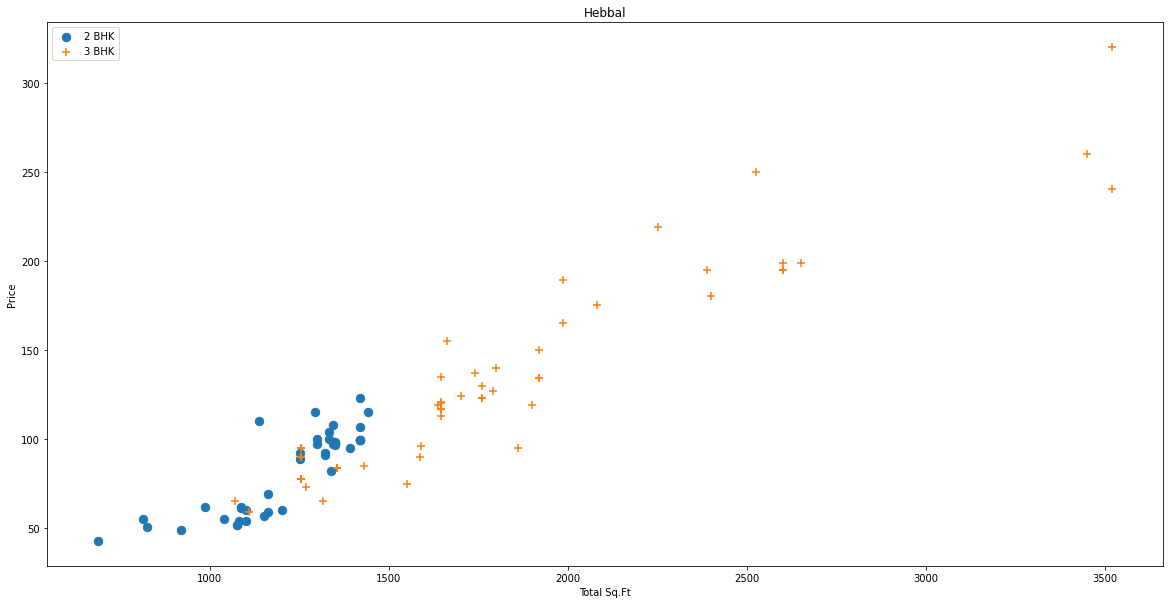

In [62]:
# Now there can be instances where for same location, price of lower bedrooms apartment could be more than higher
# bedrooms apartment.
# For example: 1 bedroom apartment cost 80 lacs in location xyz
# but          2 bedroom apartment cost 65 lacs in location xyz as well
# This is a problem and needs to be removed as outlier
# We will first visualize using a scatter plot by by locations


def visualize_prices(df, location):
    x1 = df[(df['location']==location) & (df['size']==2)]
    x2 = df[(df['location']==location) & (df['size']==3)]
    plt.figure(figsize=(20, 10))
    plt.scatter(x1['total_sqft'], x1['price'], s=70, label='2 BHK')
    plt.scatter(x2['total_sqft'], x2['price'], marker='+', s=70, label='3 BHK')
    plt.title(location)
    plt.xlabel('Total Sq.Ft')
    plt.ylabel('Price')
    plt.legend()
    
visualize_prices(df7, 'Hebbal')

In [64]:
# removing the above outliers

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape
    

(7339, 6)

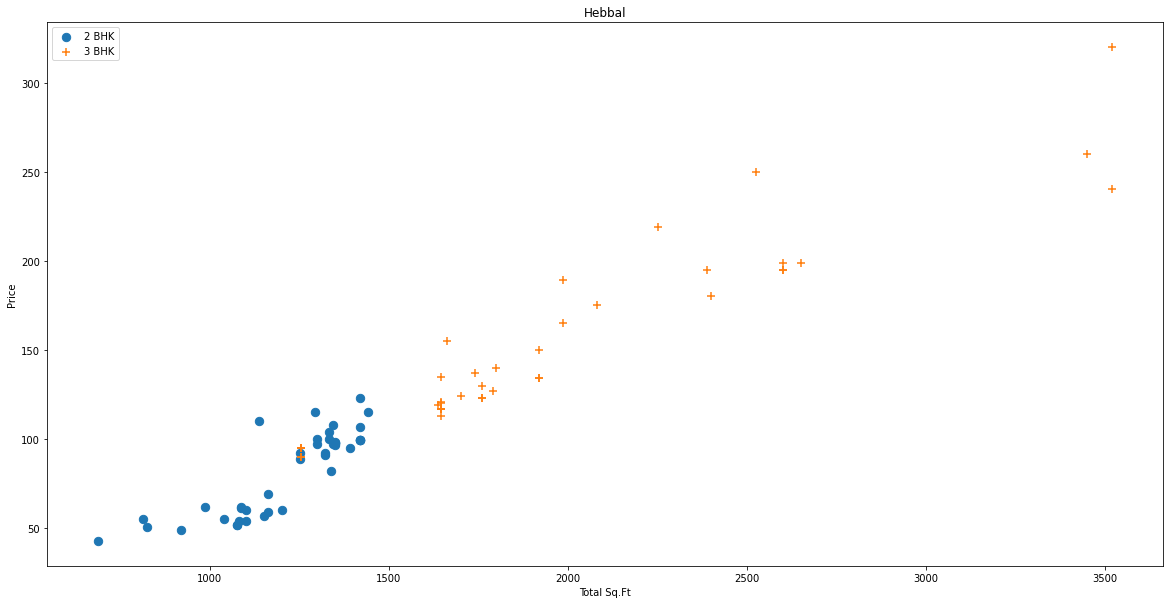

In [65]:
visualize_prices(df8, 'Hebbal') # We can see below that it is cleaner than before

(array([4.773e+03, 1.767e+03, 6.770e+02, 8.100e+01, 2.900e+01, 7.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

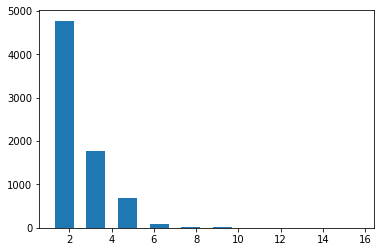

In [67]:
# Even in case of bathrooms, we may have unusually high number of bathrooms which we need to see

plt.hist(df8['bath'], rwidth=0.6)


In [81]:
# We see that most of the bathrooms are between 1 to 4 in an apartment
# We will try to remove those number of bathrooms which exceed the number of bedrooms by 2

df9 = df8[df8['bath']<=df8['size']+2]

In [82]:
df9.shape #This is the final data free of some outliers

(7335, 6)

## Model Building

In [83]:
df10 = df9.drop(['price_per_sqft'], axis=1)
df10.head()

,location,size,total_sqft,bath,price
1,Devarachikkanahalli,2,1250.00,2.00,40.00
2,Devarachikkanahalli,2,1200.00,2.00,83.00
3,Devarachikkanahalli,2,1170.00,2.00,40.00
4,Devarachikkanahalli,3,1425.00,2.00,65.00
5,Devarachikkanahalli,2,947.00,2.00,43.00


In [84]:
one_hot_location = pd.get_dummies(df10['location'])
one_hot_location.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dasanapura,Dasarahalli,Devanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HAL 2nd Stage,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Laggere,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Marsur,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,Nagavarapalya,Narayanapura,Neeladri Nagar,Nehru Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Other,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [94]:
df11 = pd.concat([df10, one_hot_location.drop('Other', axis=1)], axis=1)
df11.head()

,location,size,total_sqft,bath,price,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dasanapura,Dasarahalli,Devanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HAL 2nd Stage,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Laggere,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Marsur,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,Nagavarapalya,Narayanapura,Neeladri Nagar,Nehru Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,2,1250.00,2.00,40.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,2,1200.00,2.00,83.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [95]:
df11.shape

(7335, 245)

In [96]:
# Splitting the data in X and y for the model

X = df11.drop(['price', 'location'], axis=1)
X.head()

,size,total_sqft,bath,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,Binny Pete,Bisuvanahalli,Bommanahalli,Bommasandra,Bommasandra Industrial Area,Bommenahalli,Brookefield,Budigere,CV Raman Nagar,Chamrajpet,Chandapura,Channasandra,Chikka Tirupathi,Chikkabanavar,Chikkalasandra,Choodasandra,Cooke Town,Cox Town,Cunningham Road,Dasanapura,Dasarahalli,Devanahalli,Dodda Nekkundi,Doddaballapur,Doddakallasandra,Doddathoguru,Domlur,Dommasandra,EPIP Zone,Electronic City,Electronic City Phase II,Electronics City Phase 1,Frazer Town,GM Palaya,Garudachar Palya,Giri Nagar,Gollarapalya Hosahalli,Gottigere,Green Glen Layout,Gubbalala,Gunjur,HAL 2nd Stage,HBR Layout,HRBR Layout,HSR Layout,Haralur Road,Harlur,Hebbal,Hebbal Kempapura,Hegde Nagar,Hennur,Hennur Road,Hoodi,Horamavu Agara,Horamavu Banaswadi,Hormavu,Hosa Road,Hosakerehalli,Hoskote,Hosur Road,Hulimavu,ISRO Layout,ITPL,Iblur Village,Indira Nagar,JP Nagar,Jakkur,Jalahalli,Jalahalli East,Jigani,Judicial Layout,KR Puram,Kadubeesanahalli,Kadugodi,Kaggadasapura,Kaggalipura,Kaikondrahalli,Kalena Agrahara,Kalyan nagar,Kambipura,Kammanahalli,Kammasandra,Kanakapura,Kanakpura Road,Kannamangala,Karuna Nagar,Kasavanhalli,Kasturi Nagar,Kathriguppe,Kaval Byrasandra,Kenchenahalli,Kengeri,Kengeri Satellite Town,Kereguddadahalli,Kodichikkanahalli,Kodigehaali,Kodigehalli,Kodihalli,Kogilu,Konanakunte,Koramangala,Kothannur,Kothanur,Kudlu,Kudlu Gate,Kumaraswami Layout,Kundalahalli,LB Shastri Nagar,Laggere,Lakshminarayana Pura,Lingadheeranahalli,Magadi Road,Mahadevpura,Mahalakshmi Layout,Mallasandra,Malleshpalya,Malleshwaram,Marathahalli,Margondanahalli,Marsur,Mico Layout,Munnekollal,Murugeshpalya,Mysore Road,NGR Layout,NRI Layout,Nagarbhavi,Nagasandra,Nagavara,Nagavarapalya,Narayanapura,Neeladri Nagar,Nehru Nagar,OMBR Layout,Old Airport Road,Old Madras Road,Padmanabhanagar,Pai Layout,Panathur,Parappana Agrahara,Pattandur Agrahara,Poorna Pragna Layout,Prithvi Layout,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,2,1250.00,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1200.00,2.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [88]:
y = df11['price']
y.head()

1   40.00
2   83.00
3   40.00
4   65.00
5   43.00
Name: price, dtype: float64

In [112]:
# Importing linear regression model

from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=False)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7822953181963322

In [98]:
# Importing train test split from sklearn module and k-fold validation split

from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [108]:
cv = ShuffleSplit(5, test_size=0.2, random_state=0)
cross_val_score(Lasso(alpha=0.001, selection='random'), X, y, cv=cv)

array([0.78279602, 0.85575431, 0.84226794, 0.86512734, 0.8246342 ])

In [106]:
# Using gridsearchcv for getting best model and best params of the best model

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X, y):
    estimator={
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },

        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10],
                'selection' : ['random', 'cyclic']
            }
        },

        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(5, test_size=0.2, random_state=0)
    for algo, config in estimator.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model' : algo,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [107]:
find_best_model(X, y)

,model,best_score,best_params
0,linear_regression,0.83,{'normalize': False}
1,lasso,0.83,"{'alpha': 0.001, 'selection': 'random'}"
2,decision_tree,0.77,"{'criterion': 'mse', 'splitter': 'random'}"


Above we see Lasso and Linear regression are performing equally good. We will go ahead with Linear Regression for the model

In [122]:
# function to predict the price based on inputs

def predict_price(location, sqft, bathroom, size):
    location_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bathroom
    x[2] = size
    
    if location_index >= 0:
        x[location_index] = 1
    
    return lr.predict([x])[0]

In [124]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(lr, f)